In [2]:
%matplotlib inline


In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from vertex import *
import disease
import graph
import params
import collections
import networkx as nx
import random
G=nx.Graph()
#G.add_node("spam")
G.add_edge(1,2)
print(G.nodes())
[1, 2, 'spam']
print(G.edges())
[(1, 2)]


[1, 2]
[(1, 2)]


/home/students/doorjo01/research/researchEnv/local/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


[(1, 2)]

In [2]:
p = params.Params(8,.01,20,.5,0) #k,p,N,rho,nu
g = graph.Graph(p)
g.makeVertices()
g.makeConnections()

verts = g.getVertices()
edges = g.getEdges()

In [39]:
#for i in verts:
    #print i.getSourceTo()
#print(edges)
g.update()
print(g.getVertices())

[0 : R, 1 : S, 2 : S, 3 : R, 4 : S, 5 : R, 6 : S, 7 : S, 8 : S, 9 : R, 10 : S, 11 : R, 12 : R, 13 : S, 14 : R, 15 : S, 16 : S, 17 : S, 18 : S, 19 : R]


In [23]:
len(edges)

184

In [4]:
g = graph.Graph(8, .2, 0, 0)   #k,p,r,%infected,%vaccinated
g.makeVertices(250)
g.makeConnections(.05)

g2 = graph.Graph(8,.2,0,0)
g2.makeVertices(250)
g2.makebetterClusteredConnections(.05)

network=nx.Graph()
network.add_nodes_from(g.getVertices())

network2=nx.Graph()
network2.add_nodes_from(g2.getVertices())

edgeLst = []
for vert in g.getVertices():
    connections = vert.getConnections()
    for i in connections:
        edgeLst.append([vert,i])
network.add_edges_from(edgeLst)

edgeLst2 = []
for vert in g2.getVertices():
    connections = vert.getConnections()
    for i in connections:
        edgeLst2.append([vert,i])
network2.add_edges_from(edgeLst2)

                        
#nx.draw_networkx(network,node_size = 100,node_color="red")
#nx.draw_networkx(network2,node_size = 100,node_color="lightblue")

NoneType

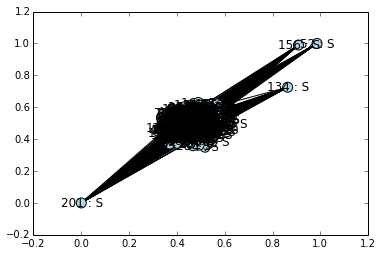

In [5]:
type(nx.draw_networkx(network2,node_size = 100,node_color="lightblue"))

##### Triangles

In [6]:
def sumTriangles(dic1):
    acc1 = 0
    for val in dic1.values():
        acc1 += val
    return acc1
        
dic1 = nx.triangles(network)
dic2 = nx.triangles(network2)

acc1 = sumTriangles(dic1)
acc2 = sumTriangles(dic2)

print(acc1,acc2)

(6906, 697545)


##### Transitivity 

In [7]:
print(nx.transitivity(network))
print(nx.transitivity(network2))

0.0944759090536
0.533286391868


#####Clustering Coefficient

In [8]:
print(nx.average_clustering(network))
print(nx.average_clustering(network2))

0.0942422629197
0.686449326614


In [9]:
def colorNodes(graph):
    colorLst = []
    for i in graph.getVertices():
        if i.getStatus() == "I":
            colorLst.append("lightred")
        elif i.getStatus() == "S":
            colorLst.append("lightblue")
        else:
            colorLst.append("gray")  #both R and V are gray
    return colorLst


In [10]:
def makeNetwork(probOfConnection):
    g = graph.Graph(8, .2, 0, 0)   #k,p,r,%infected,%vaccinated
    g.makeVertices(250)
    g.makeConnections(probOfConnection)

    network=nx.Graph()
    network.add_nodes_from(g.getVertices())

    edgeLst = []
    for vert in g.getVertices():
        connections = vert.getConnections()
        for i in connections:
            edgeLst.append([vert,i])
    network.add_edges_from(edgeLst)

def makeClusteredNetwork(probOfConnection):
    g = graph.Graph(8, .2, 0, 0)   #k,p,r,%infected,%vaccinated
    g.makeVertices(250)
    g.makebetterClusteredConnections(probOfConnection)

    network=nx.Graph()
    network.add_nodes_from(g.getVertices())

    edgeLst = []
    for vert in g.getVertices():
        connections = vert.getConnections()
        for i in connections:
            edgeLst.append([vert,i])
    network.add_edges_from(edgeLst)    

NameError: global name 'vertexclass' is not defined

In [4]:
def makeRanges(dist,numColumns):
    d = collections.OrderedDict(sorted(dist.items()))
    res = {}
    keys = d.keys()
    
    mini = keys[0]
    maxi = keys[len(d)-1]
    diff = maxi - mini
    stepSize = diff/numColumns
    currentRange = mini+stepSize
    k = mini
    acc = 0
    for k,v in d.iteritems():         
        if k < currentRange or eq(k,currentRange):
            acc +=v
            res[int(float("%.3f" %(currentRange)))] = acc
        elif k > currentRange:
            res[int(float("%.3f" %(currentRange)))] = acc
            while k > currentRange or eq(k,currentRange):
                
                currentRange += stepSize
                res[int(float("%.3f" %(currentRange)))] = 0
            acc = v
        else:
            print "lost: "+str((k,v))
        
    res[int(float("%.3f" %(currentRange)))] = acc
   
    res= collections.OrderedDict(sorted(res.items()))
    
    if not eq(k,currentRange):
        res.popitem()
        temp = res.popitem()
        lastRange = temp[0]
        lastVal = temp[1]
        
        res[lastRange] =v + lastVal
    print(len(res.keys()))
    return res
def eq( a, b, eps=0.000001 ):
    return abs(a - b) <= eps

In [7]:
lst =[e.getWeight() for e in edges]
print(lst)
dct = {}
for i in range(1000):
    lst.append(int(1000*np.random.normal(.1,.1/3)))
for i in lst:
    if i in dct:
        dct[i]+=1
    else:
        dct[i]=0
newD = makeRanges(dct,30)
print(newD)
df = pd.DataFrame.from_dict(newD,orient="index")
#print(df)
df.plot(kind="bar")

[0.009166392698343342, 0.010336726232794018, 0.006652532637361189, 0.013840229103978594, 0.009717109630742288, 0.008933101260224414, 0.0047593398992516744, 0.008351985418561515, 0.008430962158940831, 0.014823307261118475, 0.010850885069529923, 0.00972119829382612, 0.010317030177413991, 0.01440588871795414, 0.006487125953336838, 0.009950113116374238, 0.011280979442284487, 0.007678746572493006, 0.009236436392019511, 0.010276523135871364, 0.0088819405753723, 0.008991289934163725, 0.013754023077334513, 0.008396002401663919, 0.014024230415093186, 0.012172742277165235, 0.00820722072646283, 0.009905811875906195, 0.006388622947553571, 0.004541896194104604, 0.01004135553956948, 0.009753675382494713, 0.010675991081969847, 0.00943622749138566, 0.00987786083872964, 0.014659215818047262, 0.013117774666418185, 0.01527550100758119, 0.01620887264725134, 0.008729263414763098, 0.010047382632424945, 0.01082847857490568, 0.006406889231485052, 0.011435064080052954, 0.009890845249451866, 0.01114103130306610